# Shor's Algorithm

In [1]:
from qiskit import QuantumRegister, ClassicalRegister
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.tools.visualization import plot_histogram
from qiskit.providers.ibmq import least_busy

In [2]:
# load IBM Q account
IBMQ.load_accounts()

In [3]:
def power_factor(N):
    if N % 2 == 0:
        factors_lst.append(2)
        N = int(N/2)
    digit_sum = 0
    N_str = str(N)
    for digit in N_str:
        digit_sum += int(digit)
    if digit_sum % 3 == 0:
        factors_lst.append(3)
        N = int(N/3)
    if N_str[-1] == 5 or N_str[-1] == 0 or N == 5:
        factors_lst.append(5)
        N = int(N/5)
    return N
def period_func(val):
    a_list = [] # list with a-s of primes**power
    for power in range(power_limit):
        modulo = val**power % N
        if modulo not in a_list:
            a_list.append(modulo)
        else:
            period = len(a_list)
            return period
            break
def gcd_func():
    periods_lst = [] # list with period of primes
    gcd_lst = [] # list with index [0] as prime and values [gcd-, gcd+] as index [1,2]
    for val in primes:
        period = period_func(val)
        try:
            if period % 2 == 0:
                    gcd_min = np.gcd(N,val**(int(period/2))-1)
                    gcd_plus = np.gcd(N,(val**(int(period/2))+1))
                    gcd_lst.append([gcd_min, gcd_plus])
        except:
            #print("Unable to parse Integer. Try later.")
            break
    return gcd_lst

def check_factor(N):
    gcd_lst = gcd_func()
    #print(gcd_lst)
    for row in gcd_lst:
        p = row[0]
        q = row[1]
        product = p*q
        if product == N and p != N and q != N:
            factors_lst.append(p)
            factors_lst.append(q)
            break

In [4]:
def circuit(a):
    "Function assigns dedicated qc circuit to the factor a"
    global q, c, qc
    q = QuantumRegister(4)
    c = ClassicalRegister(4)
    qc = QuantumCircuit(q, c)
    if a == 2: # bin 10
        qc.x(q[0])
        qc.cx(q[0],q[1])
        qc.x(q[0])
        qc.measure(q, c)

    elif a == 3: # bin 11
        qc.x(q[0])
        qc.cx(q[0],q[1])
        qc.measure(q, c)
        qc.x(q[1])
    elif a == 5: # bin 101
        qc.x(q[0])
        qc.cx(q[0],q[2])
        qc.measure(q, c)

    elif a == 7: # bin 111
        qc.x(q[0])
        qc.cx(q[0],q[1])
        qc.cx(q[0],q[2])
        qc.measure(q, c)
    
def execute_job(device):
    global data
    backend = Aer.get_backend(device)
    job_sim = execute(qc, backend)
    sim_result = job_sim.result()
    data = sim_result.get_counts(qc)
    print(data)

In [28]:
# define global variables
N = 30 # the input integer
primes = [2,3,5,7]
power_limit = 20 # the limit of power for prime number p**k
factors_lst = []
device = 'qasm_simulator'

# main
try:
    N_new = power_factor(N)
    if N_new in primes:
        factors_lst.append(N_new)
    #print(N_new, factors_lst)
    check_factor(N_new)

    factors_set = set(factors_lst)
    factors_lst_unique = list(factors_set)

    # run circuit
    sim_result_dict = {}
    print("Factors in binary:")
    for i in factors_lst_unique:
        circuit(i)
        execute_job(device)
        # append master dictionary with results
        for key,val in data.items():
            sim_result_dict[key] = val

    print("\nMost likely, factors of {} are:".format(N))

    for i in factors_lst_unique:
        print("{}".format(i))
    
except:
    print('The exception occured: a) input is prime integer > 7 OR b) the input out of range (Nmax > 49)')


Factors in binary:
{'0010': 1024}
{'0011': 1024}
{'0101': 1024}

Most likely, factors of 30 are:
2
3
5


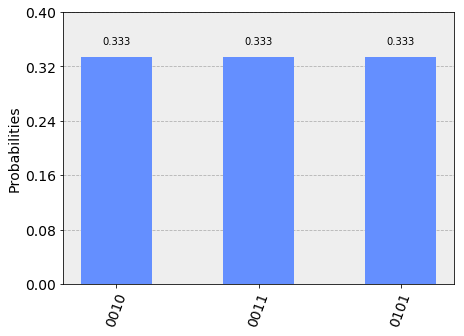

In [29]:
# plot results
plot_histogram(sim_result_dict)

In [ ]:
# run on real QC
#from qiskit.tools.jupyter import *
#%%qiskit_job_status

# define the least busy device
backend = least_busy(IBMQ.backends(simulator=False))
print("The least busy device:",backend.name())

# run circuit
sim_result_dict = {}

for i in factors_lst_unique:
    circuit(i)
    data = execute(qc, backend=backend, shots=1024, max_credits=3).result().get_counts(qc)
    # append master dictionary with results
    for key,val in data.items():
        sim_result_dict[key] = val

# display results
print("Factors in binary:")
print(sim_result_dict)
plot_histogram(sim_result_dict)

The least busy device: ibmqx4
